In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math    #for using floor in creating minibatches


#core packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse


#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches

from finalModelUtils import *
from ffnn import *

np.random.seed(1)
%matplotlib inline

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 25
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 25%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(15000, 28, 28)
Training Set Labels:	(60000, 1)		(15000, 1)
Training Set Images:	(5000, 28, 28)		(1250, 28, 28)
Training Set Labels:	(5000, 1)		(1250, 1)
Test Set Images:	(5000, 28, 28)		(1250, 28, 28)
Test Set Labels:	(5000, 1)		(1250, 1)


In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_sample.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_sample.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_sample.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_sample.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_sample.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_sample.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(15000, 28, 28)		(784, 15000)
Training Set Labels:	(15000, 1)		(10, 15000)
Dev Set Images:		(1250, 28, 28)		(784, 1250)
Dev Set Labels:		(1250, 1)		(10, 1250)
Test Set Images:	(1250, 28, 28)		(784, 1250)
Test Set Labels:	(1250, 1)		(10, 1250)


## Model Implementation

In [5]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [800,300])

In [ ]:
hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 5, mini_batch_size = 512,lambd = 0.7,keep_probs = [0.9,0.8,])

In [ ]:
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = 'l2') 

## Random Search 2D

### Random Sampling

In [ ]:
sam = []
for i in range(100):
    r = np.random.uniform(-5, -1)
    p = 10 ** r
#     print(r,p)
    sam.append(p)


plt.hist(sam,bins = 10)
    
    
plt.xscale('log')
plt.grid()

In [6]:
def sample_hyperParams(hParam_type, rng, sample_size):

    sample = []
    
    lower_range = rng[0]
    higher_range = rng[1]
    
    
    for i in range(sample_size):
        if hParam_type == "learning_rate":
            r = np.random.uniform(lower_range,higher_range)
            p = 10 ** r
            sample.append(p)
        elif hParam_type == "minibatch_size":
            s = np.random.randint(low = lower_range, high = higher_range)
            sample.append(s)
        else:
            raise ValueError("Sampling of only learning rate and minibatch size is possible for now")
            
    assert(len(sample) == sample_size)
    
    return sample



In [ ]:

leaning_rate_ = sample_hyperParams(hParam_type ="learning_rate",rng = [-4,-1],sample_size = 200)
minibatch_size_ = sample_hyperParams(hParam_type ="minibatch_size",rng = [16,1024],sample_size = 200)

# plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15))
ax[0,0].set_ylim(top = 1.2 * 10e-2, bottom = 0.8 * 10e-5)
ax[0,0].scatter(minibatch_size_,leaning_rate_, color = "gray")
ax[0,0].set_yscale('log')
# ax[0,0].grid()
rec = Rectangle((128,0.0001), 800-128 , 0.006-0.0001, fill=False, edgecolor="green")
ax[0,0].add_patch(rec)

# Add labels to the plot
style = dict(size=10, color='blue', alpha = 0.5)
ax[0,0].text(128, 0.006+0.006*0.1, "New Search Range ", ha='left', **style)

c = Ellipse((356,0.0005),width = 0.1 * 356 ,  height =0.25 * 0.0005, edgecolor='crimson', fill = False, alpha=0.5)
ax[0,0].add_patch(c)
ax[0,0].text(356 + 25, 0.0005 , "Best Choice ", ha='left', **style)


num_mini_batch = ax[1,0].hist(minibatch_size_, bins = 20)

num_alpha = ax[1,1].hist(leaning_rate_, bins = 100)
ax[1,1].set_xscale('log') #changing the scale to log scale to plot learning rate which is in log scale
plt.show()


In [ ]:
c = [0.90469, 0.95724, 0.98351, 0.93557, 0.92510, 0.93944, 0.99800, 0.91968]
l = [0.00022, 0.00002, 0.00001, 0.00022, 0.00533, 0.00202, 0.00028, 0.00013]
m = [725, 175, 613, 1625, 910, 1868, 2084, 1170]

sorted_c = [b[1] for b in sorted(enumerate(c),key=lambda i:i[1], reverse = True)]
orig_sorted_c_index = [b[0] for b in sorted(enumerate(c),key=lambda i:i[1], reverse = True)]
# print(sorted_c)
print(orig_sorted_c_index)

print([c[i] for i in orig_sorted_c_index[:6]])

print([l[i] for i in orig_sorted_c_index])
print([m[i] for i in orig_sorted_c_index])


In [7]:
def calculate_new_search_space(score, samples, score_threshold = 0, summary = True):
    learning_rate = samples["learning_rate"]
    minibatch_size = samples["minibatch_size"]
    
    good_lrs = []
    good_mbs = []
    good_scs = []
    
    if score_threshold == 0:
        top_val = 10
        #if threshold = 0 use the top 10(top_val) best accuracy and their corresponding hyper parameters
        sorted_score_index = [b[0] for b in sorted(enumerate(score),key=lambda i:i[1], reverse = True)]
        good_lrs = [learning_rate[i] for i in sorted_score_index[:top_val]]
        good_mbs = [minibatch_size[i] for i in sorted_score_index[:top_val]]
        good_scs = [score[i] for i in sorted_score_index[:top_val]]
    else:
        #getting the score above the threshold and along with their corresponding hyper parameters
        for ind, val in enumerate(score):
            if val > score_threshold:
                good_lrs.append(learning_rate[ind])
                good_mbs.append(minibatch_size[ind])
                good_scs.append(val)
            
    if len(good_scs) > 1:  
        
        if summary == True:
            print("+================+===============+================+")
            print("| Validation Acc | Learning Rate | Minibatch Size |")
            print("+================+===============+================+")

            for ind,sc in enumerate(good_scs):
                print("| %.5f\t | %.5f\t | %d\t\t  |"%(sc, good_lrs[ind], good_mbs[ind]))

            print("+================+===============+================+")
        
        #calculating the new search range in log form after expanding the learning rate space by 10%
        lr_rng_new = [np.log10(0.9 * min(good_lrs) ), np.log10(1.1 * max(good_lrs))] 

        #calculating the new search range for minibatch size by expanding the search space by 5%
        mbs_rng_new = [0.85 * min(good_mbs), 1.15 * max(good_mbs)] 
        
    else:
        print("No accuracy or only one accuracy beyond threshold was obtained, so range was calculated based on the best score")
        max_lr = learning_rate[np.argmax(score)] 
        
        #calculating the new search range in log form  from the learning rate of best score, expanding by 50 % in each direction
        lr_rng_new = [np.log10(0.5 * max_lr), np.log10(1.5 * max_lr)] #calculating the range in log scale
        
        max_mbs = minibatch_size[np.argmax(score)]
        
        #calculating the new search range from the minibatch size of best score, expanding by 25 % in each direction
        mbs_rng_new = [0.75 * max_mbs, 1.25 * max_mbs] #calculaing the range
        
        
        
    #best hyper parameter combinations
    best_comb = [np.max(score),learning_rate[np.argmax(score)],minibatch_size[np.argmax(score)]]

    if summary == True:
       
        print("New Search Space for Learning Rate: [%.6f,%.6f], log range: [10e%.2f,10e%.2f]"%(10 ** lr_rng_new[0], 10 ** lr_rng_new[1], lr_rng_new[0], lr_rng_new[1]))
        print("New Search Space for Minibatch Size: [%d,%d]"%(mbs_rng_new[0], mbs_rng_new[1]))
        print("Best Score: %.6f "%(best_comb[0]))
        print("Best Hyper Params:\n Learning Rate: %.6f\n Minibatch Size: %d"%(best_comb[1], best_comb[2]))
  
    
    return lr_rng_new, mbs_rng_new, best_comb


In [ ]:
sc = np.random.uniform(0,1,100)

lr = []
for i in range(100):
    r = np.random.uniform(-5, -1)
    p = 10 ** r
    lr.append(p)
    
mbz = np.random.randint(50,2200,100)

samples = {"learning_rate": lr,
               "minibatch_size" : mbz}
score_threshold = 0


lr_rng, mbs_rng, best = calculate_new_search_space(sc,samples,score_threshold, summary = True)

In [8]:
def visualize_search(samples,score, lr_rng_new, mbs_rng_new, best_comb,lr_rng_old, mbs_rng_old):
    
    learning_rate = samples["learning_rate"]
    minibatch_size = samples["minibatch_size"]
    lr_min = 10 ** lr_rng_new[0]
    lr_max = 10 ** lr_rng_new[1]
    # plt.style.use('seaborn')
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7))
    #setting ylim based on old range
    ylim_max = 10 ** (int(lr_rng_old[1]))
    if int(lr_rng_old[0]) == lr_rng_old[0]:
        ylim_min = 10 ** (int(lr_rng_old[0])) 
    else:
        ylim_min = 10 ** (int(lr_rng_old[0])-1) 
    
   
    ax.set_ylim(top = ylim_max, bottom = ylim_min)
    
    ax.scatter(minibatch_size,learning_rate, color = "gray",alpha=0.80)
    ax.set_yscale('log')
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    rec = Rectangle((mbs_rng_new[0], lr_min), mbs_rng_new[1] - mbs_rng_new[0], lr_max - lr_min, fill=False, edgecolor="green")
    ax.add_patch(rec)

    c = Ellipse((best_comb[2],best_comb[1]),width = 30,  height =0.30 * best_comb[1], edgecolor='green', fill = False, alpha=0.5)
    ax.add_patch(c)
    ax.scatter(best_comb[2],best_comb[1], color = "crimson",alpha=1)


    # Add labels to the plot
    style = dict(size=10, color='blue', alpha = 0.8)
    ax.text(mbs_rng_new[0], lr_max + 0.1*lr_max, "New Search Range ", ha='left', **style)
    ax.text(best_comb[2] + 25, best_comb[1] , "Best Choice ", ha='left', **style)

    
    plt.show()


In [ ]:
sc = np.random.uniform(0,.98,50)

lr = []
for i in range(50):
    r = np.random.uniform(np.log10(0.002660),np.log10(0.007176))
    p = 10 ** r
    lr.append(p)
    
mbz = np.random.randint(250,624,50)

samples = {"learning_rate": lr,
               "minibatch_size" : mbz}
score_threshold = 0.98

lr_rng, mbs_rng, best = calculate_new_search_space(sc, samples, score_threshold, summary = True)

visualize_search(samples,sc, lr_rng, mbs_rng, best, lr_rng_old = [np.log10(0.002660),np.log10(0.007176)], mbs_rng_old = [250,624])

In [9]:
#Coarse search with 2 epoch, fine search with 5 epoch and detailed search with 10 epoch

def random_search_2D(param1, param2, search_type ="coarse", evaluate_metric = "accuracy", sample_size = 100, search_summary = True, search_visualization = True):
    
    #accessing the input parameter types and their range
    hParam_type1 = param1["hParam type"]
    hParam_range1 = param1["hParam range"]
    
    hParam_type2 = param2["hParam type"]
    hParam_range2 = param2["hParam range"]
    
    samples = {} #for storing the generated samples
    
    #checking the search type
    if search_type == "coarse":
        epoch_size = 2
        score_threshold = 0.95
    elif search_type == "fine":
        epoch_size = 5
        score_threshold = 0.97
    elif search_type == "detail":
        epoch_size = 10
        score_threshold = 0.99
    else:
        raise ValueError("Search Type not identified. Must be 'coarse', 'fine', or 'detail'")
    
    #generating Samples for two input parameters
    samples[hParam_type1] = sample_hyperParams(hParam_type = hParam_type1, rng = hParam_range1, sample_size = sample_size)
    samples[hParam_type2] = sample_hyperParams(hParam_type = hParam_type2,rng = hParam_range2, sample_size = sample_size)
    
            
    if hParam_type1 == "learning_rate":
        leaning_rate_samples =  samples[hParam_type1]
    elif hParam_type2 == "learning_rate":
        leaning_rate_samples =  samples[hParam_type2]
    

    if hParam_type2 == "minibatch_size":
        minibatch_size_samples =  samples[hParam_type2]
    elif hParam_type1 == "minibatch_size":
        minibatch_size_samples =  samples[hParam_type2]
    
        
    score = []
    
    toc = time.time()
        
    for i in range(sample_size):
        print("\nSample: %d/%d -- Learning Rate: %.6f | Minibatch Size: %d"%(i+1,sample_size,leaning_rate_samples[i],minibatch_size_samples[i]))
        print("==========================================================================================================")
        
        hyperParams = init_hyperParams(alpha = leaning_rate_samples[i], num_epoch = epoch_size, mini_batch_size = minibatch_size_samples[i])
        
        parameters = train(train_x_norm, train_y_encoded, dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam', visualize = False) 
        
        if evaluate_metric == "accuracy":
            prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters)
            score.append(dev_acc)

        elif evaluate_metric == "f1-score": 
            pass

        else:
            raise ValueError("Metric must be 'accuracy' or 'f1-score'")
        
    print("==========================================================================================================")
    
    tic = time.time() # for calculating entire search time
    hrs, mins, secs , ms = convert_time((tic - toc)*1000)
    
    print("\n\n*************************** Total Search Time = %dhr %dmins %dsecs %.2fms ***************************\n\n"%(hrs, mins, secs, ms))
    
    assert(len(score) == sample_size)
    
    
    
    if search_summary == True:
        print(search_type.capitalize()+" Search Summary: \n")
    
    lr_rng_new, mbs_rng_new, best_comb = calculate_new_search_space(score, samples, score_threshold=0 , summary = search_summary)
    
    if search_visualization == True:
        visualize_search(samples,score,lr_rng_new, mbs_rng_new, best_comb,hParam_range1,hParam_range2)
    
    return lr_rng_new, mbs_rng_new, best_comb


Sample: 1/200 -- Learning Rate: 0.037885 | Minibatch Size: 499

Epoch: 1/2
15000/15000 [==========> 100%] - 13.71s | loss: 0.5369 | acc: 0.8412 | Val loss: 0.5567 | Val acc: 0.8376 
Epoch: 2/2
15000/15000 [==========> 100%] - 15.95s | loss: 0.2866 | acc: 0.9161 | Val loss: 0.3332 | Val acc: 0.9184 

*************************** Total Training Time = 0hr 0mins 29secs 726.18ms ***************************

Sample: 2/200 -- Learning Rate: 0.004453 | Minibatch Size: 674

Epoch: 1/2
15000/15000 [==========> 100%] - 12.50s | loss: 0.2493 | acc: 0.9257 | Val loss: 0.2510 | Val acc: 0.9248 
Epoch: 2/2
15000/15000 [==========> 100%] - 10.90s | loss: 0.1276 | acc: 0.9624 | Val loss: 0.1476 | Val acc: 0.9576 

*************************** Total Training Time = 0hr 0mins 23secs 462.25ms ***************************

Sample: 3/200 -- Learning Rate: 0.000237 | Minibatch Size: 835

Epoch: 1/2
15000/15000 [==========> 100%] - 8.95s | loss: 0.8914 | acc: 0.8318 | Val loss: 0.8592 | Val acc: 0.8480 
Epoch:

/home/befrenz/Sameer Kattel/Education/Course/CSIT/7th Semester/Project Work/HandWritten-Digit-Recognition-using-Deep-Learning/7. Final Model/ffnn.py:162: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
/home/befrenz/Sameer Kattel/Education/Course/CSIT/7th Semester/Project Work/HandWritten-Digit-Recognition-using-Deep-Learning/7. Final Model/ffnn.py:162: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))


15000/15000 [==========> 100%] - 10.02s | loss: 1.1913 | acc: 0.6099 | Val loss: 1.1718 | Val acc: 0.6056 
Epoch: 2/2
15000/15000 [==========> 100%] - 10.01s | loss: 0.5949 | acc: 0.7787 | Val loss: 0.6021 | Val acc: 0.7944 

*************************** Total Training Time = 0hr 0mins 20secs 100.66ms ***************************

Sample: 10/200 -- Learning Rate: 0.013420 | Minibatch Size: 806

Epoch: 1/2
15000/15000 [==========> 100%] - 9.79s | loss: 0.3606 | acc: 0.8939 | Val loss: 0.3749 | Val acc: 0.8984 
Epoch: 2/2
15000/15000 [==========> 100%] - 11.71s | loss: 0.1739 | acc: 0.9472 | Val loss: 0.1950 | Val acc: 0.9480 

*************************** Total Training Time = 0hr 0mins 21secs 568.33ms ***************************

Sample: 11/200 -- Learning Rate: 0.000160 | Minibatch Size: 43

Epoch: 1/2
15000/15000 [==========> 100%] - 177.69s | loss: 0.2496 | acc: 0.9333 | Val loss: 0.2538 | Val acc: 0.9312 
Epoch: 2/2
15000/15000 [==========> 100%] - 187.01s | loss: 0.1563 | acc: 0.9590

/home/befrenz/Sameer Kattel/Education/Course/CSIT/7th Semester/Project Work/HandWritten-Digit-Recognition-using-Deep-Learning/7. Final Model/finalModelUtils.py:64: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(t,np.sum(t,axis = 0))


/home/befrenz/Sameer Kattel/Education/Course/CSIT/7th Semester/Project Work/HandWritten-Digit-Recognition-using-Deep-Learning/7. Final Model/finalModelUtils.py:45: RuntimeWarning: invalid value encountered in less
  dZ[Z < 0] = 0


15000/15000 [==========> 100%] - 11.05s | loss: nan | acc: 0.0977 | Val loss: nan | Val acc: 0.0840 
Epoch: 2/2
15000/15000 [==========> 100%] - 10.85s | loss: nan | acc: 0.0977 | Val loss: nan | Val acc: 0.0840 

*************************** Total Training Time = 0hr 0mins 21secs 960.51ms ***************************

Sample: 17/200 -- Learning Rate: 0.000126 | Minibatch Size: 976

Epoch: 1/2
15000/15000 [==========> 100%] - 7.61s | loss: 1.4758 | acc: 0.7213 | Val loss: 1.4731 | Val acc: 0.7256 
Epoch: 2/2
15000/15000 [==========> 100%] - 7.60s | loss: 0.8949 | acc: 0.8339 | Val loss: 0.8659 | Val acc: 0.8456 

*************************** Total Training Time = 0hr 0mins 15secs 264.73ms ***************************

Sample: 18/200 -- Learning Rate: 0.089180 | Minibatch Size: 385

Epoch: 1/2
15000/15000 [==========> 100%] - 14.53s | loss: nan | acc: 0.0977 | Val loss: nan | Val acc: 0.0840 
Epoch: 2/2
15000/15000 [==========> 100%] - 14.51s | loss: nan | acc: 0.0977 | Val loss: nan | Val 

15000/15000 [==========> 100%] - 198.88s | loss: 0.1242 | acc: 0.9620 | Val loss: 0.1629 | Val acc: 0.9544 
Epoch: 2/2
15000/15000 [==========> 100%] - 197.91s | loss: 0.0623 | acc: 0.9815 | Val loss: 0.1160 | Val acc: 0.9680 

*************************** Total Training Time = 0hr 6mins 36secs 985.74ms ***************************

Sample: 33/200 -- Learning Rate: 0.001022 | Minibatch Size: 283

Epoch: 1/2
15000/15000 [==========> 100%] - 23.01s | loss: 0.2330 | acc: 0.9314 | Val loss: 0.2537 | Val acc: 0.9232 
Epoch: 2/2
15000/15000 [==========> 100%] - 23.47s | loss: 0.1251 | acc: 0.9650 | Val loss: 0.1614 | Val acc: 0.9536 

*************************** Total Training Time = 0hr 0mins 46secs 543.42ms ***************************

Sample: 34/200 -- Learning Rate: 0.006368 | Minibatch Size: 128

Epoch: 1/2
15000/15000 [==========> 100%] - 46.83s | loss: 0.1876 | acc: 0.9424 | Val loss: 0.2315 | Val acc: 0.9312 
Epoch: 2/2
15000/15000 [==========> 100%] - 46.70s | loss: 0.0958 | acc: 0.96

15000/15000 [==========> 100%] - 8.35s | loss: 0.3268 | acc: 0.9053 | Val loss: 0.3064 | Val acc: 0.9144 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.28s | loss: 0.2103 | acc: 0.9406 | Val loss: 0.2170 | Val acc: 0.9416 

*************************** Total Training Time = 0hr 0mins 16secs 684.02ms ***************************

Sample: 49/200 -- Learning Rate: 0.004712 | Minibatch Size: 994

Epoch: 1/2
15000/15000 [==========> 100%] - 7.29s | loss: 0.3269 | acc: 0.9088 | Val loss: 0.3026 | Val acc: 0.9160 
Epoch: 2/2
15000/15000 [==========> 100%] - 7.26s | loss: 0.1746 | acc: 0.9487 | Val loss: 0.1929 | Val acc: 0.9440 

*************************** Total Training Time = 0hr 0mins 14secs 609.13ms ***************************

Sample: 50/200 -- Learning Rate: 0.000953 | Minibatch Size: 700

Epoch: 1/2
15000/15000 [==========> 100%] - 10.54s | loss: 0.2994 | acc: 0.9136 | Val loss: 0.2875 | Val acc: 0.9224 
Epoch: 2/2
15000/15000 [==========> 100%] - 10.55s | loss: 0.1885 | acc: 0.9479 | V

15000/15000 [==========> 100%] - 16.74s | loss: 0.2197 | acc: 0.9352 | Val loss: 0.2255 | Val acc: 0.9344 
Epoch: 2/2
15000/15000 [==========> 100%] - 16.99s | loss: 0.1392 | acc: 0.9578 | Val loss: 0.1715 | Val acc: 0.9560 

*************************** Total Training Time = 0hr 0mins 33secs 799.98ms ***************************

Sample: 65/200 -- Learning Rate: 0.000134 | Minibatch Size: 453

Epoch: 1/2
15000/15000 [==========> 100%] - 19.03s | loss: 0.8590 | acc: 0.8347 | Val loss: 0.8271 | Val acc: 0.8552 
Epoch: 2/2
15000/15000 [==========> 100%] - 19.82s | loss: 0.4401 | acc: 0.8942 | Val loss: 0.4091 | Val acc: 0.9080 

*************************** Total Training Time = 0hr 0mins 38secs 919.55ms ***************************

Sample: 66/200 -- Learning Rate: 0.000679 | Minibatch Size: 959

Epoch: 1/2
15000/15000 [==========> 100%] - 9.78s | loss: 0.4062 | acc: 0.8862 | Val loss: 0.3670 | Val acc: 0.8960 
Epoch: 2/2
15000/15000 [==========> 100%] - 9.10s | loss: 0.2577 | acc: 0.9269 |

15000/15000 [==========> 100%] - 9.74s | loss: 0.3956 | acc: 0.8805 | Val loss: 0.4073 | Val acc: 0.8848 
Epoch: 2/2
15000/15000 [==========> 100%] - 9.79s | loss: 0.1890 | acc: 0.9431 | Val loss: 0.2165 | Val acc: 0.9392 

*************************** Total Training Time = 0hr 0mins 19secs 587.16ms ***************************

Sample: 81/200 -- Learning Rate: 0.000394 | Minibatch Size: 796

Epoch: 1/2
15000/15000 [==========> 100%] - 9.79s | loss: 0.5245 | acc: 0.8684 | Val loss: 0.4848 | Val acc: 0.8856 
Epoch: 2/2
15000/15000 [==========> 100%] - 9.80s | loss: 0.3035 | acc: 0.9149 | Val loss: 0.2877 | Val acc: 0.9248 

*************************** Total Training Time = 0hr 0mins 19secs 644.46ms ***************************

Sample: 82/200 -- Learning Rate: 0.032087 | Minibatch Size: 635

Epoch: 1/2
15000/15000 [==========> 100%] - 11.00s | loss: 0.4127 | acc: 0.8675 | Val loss: 0.3840 | Val acc: 0.8728 
Epoch: 2/2
15000/15000 [==========> 100%] - 11.06s | loss: 0.2140 | acc: 0.9357 | V

15000/15000 [==========> 100%] - 64.88s | loss: 0.1807 | acc: 0.9469 | Val loss: 0.2068 | Val acc: 0.9424 
Epoch: 2/2
15000/15000 [==========> 100%] - 68.14s | loss: 0.0842 | acc: 0.9771 | Val loss: 0.1315 | Val acc: 0.9640 

*************************** Total Training Time = 0hr 2mins 13secs 109.50ms ***************************

Sample: 97/200 -- Learning Rate: 0.003724 | Minibatch Size: 42

Epoch: 1/2
15000/15000 [==========> 100%] - 143.88s | loss: 0.1330 | acc: 0.9590 | Val loss: 0.1657 | Val acc: 0.9512 
Epoch: 2/2
15000/15000 [==========> 100%] - 141.57s | loss: 0.0843 | acc: 0.9757 | Val loss: 0.1446 | Val acc: 0.9592 

*************************** Total Training Time = 0hr 4mins 45secs 598.68ms ***************************

Sample: 98/200 -- Learning Rate: 0.014222 | Minibatch Size: 800

Epoch: 1/2
15000/15000 [==========> 100%] - 8.71s | loss: 0.3330 | acc: 0.9029 | Val loss: 0.3208 | Val acc: 0.9080 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.25s | loss: 0.1651 | acc: 0.9497 

15000/15000 [==========> 100%] - 12.73s | loss: 1.1183 | acc: 0.8066 | Val loss: 1.0971 | Val acc: 0.8168 
Epoch: 2/2
15000/15000 [==========> 100%] - 12.49s | loss: 0.5709 | acc: 0.8756 | Val loss: 0.5353 | Val acc: 0.8912 

*************************** Total Training Time = 0hr 0mins 25secs 286.39ms ***************************

Sample: 113/200 -- Learning Rate: 0.000283 | Minibatch Size: 614

Epoch: 1/2
15000/15000 [==========> 100%] - 11.35s | loss: 0.5550 | acc: 0.8653 | Val loss: 0.5160 | Val acc: 0.8848 
Epoch: 2/2
15000/15000 [==========> 100%] - 12.74s | loss: 0.3138 | acc: 0.9148 | Val loss: 0.2954 | Val acc: 0.9240 

*************************** Total Training Time = 0hr 0mins 24secs 150.54ms ***************************

Sample: 114/200 -- Learning Rate: 0.000694 | Minibatch Size: 504

Epoch: 1/2
15000/15000 [==========> 100%] - 14.24s | loss: 0.2961 | acc: 0.9137 | Val loss: 0.2786 | Val acc: 0.9296 
Epoch: 2/2
15000/15000 [==========> 100%] - 14.20s | loss: 0.1947 | acc: 0.94

15000/15000 [==========> 100%] - 14.55s | loss: 0.2027 | acc: 0.9426 | Val loss: 0.2173 | Val acc: 0.9424 
Epoch: 2/2
15000/15000 [==========> 100%] - 14.13s | loss: 0.1442 | acc: 0.9568 | Val loss: 0.1790 | Val acc: 0.9480 

*************************** Total Training Time = 0hr 0mins 28secs 751.92ms ***************************

Sample: 129/200 -- Learning Rate: 0.002459 | Minibatch Size: 811

Epoch: 1/2
15000/15000 [==========> 100%] - 9.46s | loss: 0.2675 | acc: 0.9239 | Val loss: 0.2671 | Val acc: 0.9216 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.99s | loss: 0.1478 | acc: 0.9575 | Val loss: 0.1658 | Val acc: 0.9552 

*************************** Total Training Time = 0hr 0mins 18secs 514.28ms ***************************

Sample: 130/200 -- Learning Rate: 0.000194 | Minibatch Size: 973

Epoch: 1/2
15000/15000 [==========> 100%] - 8.03s | loss: 1.1487 | acc: 0.7971 | Val loss: 1.1287 | Val acc: 0.8048 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.67s | loss: 0.5868 | acc: 0.8702 |

15000/15000 [==========> 100%] - 15.18s | loss: 0.3316 | acc: 0.9081 | Val loss: 0.3208 | Val acc: 0.9160 
Epoch: 2/2
15000/15000 [==========> 100%] - 16.05s | loss: 0.2094 | acc: 0.9403 | Val loss: 0.2340 | Val acc: 0.9320 

*************************** Total Training Time = 0hr 0mins 31secs 292.70ms ***************************

Sample: 145/200 -- Learning Rate: 0.057565 | Minibatch Size: 513

Epoch: 1/2
15000/15000 [==========> 100%] - 15.19s | loss: 0.5918 | acc: 0.8434 | Val loss: 0.5974 | Val acc: 0.8560 
Epoch: 2/2
15000/15000 [==========> 100%] - 15.56s | loss: 0.3880 | acc: 0.8835 | Val loss: 0.4132 | Val acc: 0.8864 

*************************** Total Training Time = 0hr 0mins 30secs 821.58ms ***************************

Sample: 146/200 -- Learning Rate: 0.038633 | Minibatch Size: 470

Epoch: 1/2
15000/15000 [==========> 100%] - 15.90s | loss: 0.4750 | acc: 0.8754 | Val loss: 0.5194 | Val acc: 0.8712 
Epoch: 2/2
15000/15000 [==========> 100%] - 13.84s | loss: 0.2551 | acc: 0.92

15000/15000 [==========> 100%] - 10.51s | loss: 0.2411 | acc: 0.9292 | Val loss: 0.2494 | Val acc: 0.9272 
Epoch: 2/2
15000/15000 [==========> 100%] - 10.49s | loss: 0.1155 | acc: 0.9655 | Val loss: 0.1429 | Val acc: 0.9568 

*************************** Total Training Time = 0hr 0mins 21secs 51.02ms ***************************

Sample: 161/200 -- Learning Rate: 0.034282 | Minibatch Size: 63

Epoch: 1/2
15000/15000 [==========> 100%] - 89.81s | loss: 0.2834 | acc: 0.9163 | Val loss: 0.2776 | Val acc: 0.9312 
Epoch: 2/2
15000/15000 [==========> 100%] - 89.32s | loss: 0.4191 | acc: 0.8897 | Val loss: 0.4267 | Val acc: 0.9032 

*************************** Total Training Time = 0hr 2mins 59secs 250.79ms ***************************

Sample: 162/200 -- Learning Rate: 0.005639 | Minibatch Size: 830

Epoch: 1/2
15000/15000 [==========> 100%] - 8.40s | loss: 0.3211 | acc: 0.9075 | Val loss: 0.2981 | Val acc: 0.9152 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.36s | loss: 0.1695 | acc: 0.9497 |

15000/15000 [==========> 100%] - 202.53s | loss: 1.5346 | acc: 0.4216 | Val loss: 1.5285 | Val acc: 0.4472 
Epoch: 2/2
15000/15000 [==========> 100%] - 196.93s | loss: 1.3724 | acc: 0.4853 | Val loss: 1.3263 | Val acc: 0.4920 

*************************** Total Training Time = 0hr 6mins 39secs 667.98ms ***************************

Sample: 177/200 -- Learning Rate: 0.002708 | Minibatch Size: 999

Epoch: 1/2
15000/15000 [==========> 100%] - 7.43s | loss: 0.3621 | acc: 0.8991 | Val loss: 0.3460 | Val acc: 0.9008 
Epoch: 2/2
15000/15000 [==========> 100%] - 7.42s | loss: 0.2425 | acc: 0.9270 | Val loss: 0.2575 | Val acc: 0.9208 

*************************** Total Training Time = 0hr 0mins 14secs 909.60ms ***************************

Sample: 178/200 -- Learning Rate: 0.028432 | Minibatch Size: 862

Epoch: 1/2
15000/15000 [==========> 100%] - 7.67s | loss: 0.5397 | acc: 0.8224 | Val loss: 0.5039 | Val acc: 0.8360 
Epoch: 2/2
15000/15000 [==========> 100%] - 7.64s | loss: 0.2792 | acc: 0.9208

15000/15000 [==========> 100%] - 14.10s | loss: 0.5036 | acc: 0.8751 | Val loss: 0.4642 | Val acc: 0.8920 
Epoch: 2/2
15000/15000 [==========> 100%] - 14.15s | loss: 0.3041 | acc: 0.9191 | Val loss: 0.2878 | Val acc: 0.9264 

*************************** Total Training Time = 0hr 0mins 28secs 312.14ms ***************************

Sample: 193/200 -- Learning Rate: 0.001228 | Minibatch Size: 818

Epoch: 1/2
15000/15000 [==========> 100%] - 8.88s | loss: 0.3083 | acc: 0.9119 | Val loss: 0.2952 | Val acc: 0.9192 
Epoch: 2/2
15000/15000 [==========> 100%] - 8.62s | loss: 0.1865 | acc: 0.9474 | Val loss: 0.2017 | Val acc: 0.9472 

*************************** Total Training Time = 0hr 0mins 17secs 563.04ms ***************************

Sample: 194/200 -- Learning Rate: 0.000399 | Minibatch Size: 34

Epoch: 1/2
15000/15000 [==========> 100%] - 183.91s | loss: 0.1627 | acc: 0.9550 | Val loss: 0.1993 | Val acc: 0.9464 
Epoch: 2/2
15000/15000 [==========> 100%] - 185.53s | loss: 0.0890 | acc: 0.974

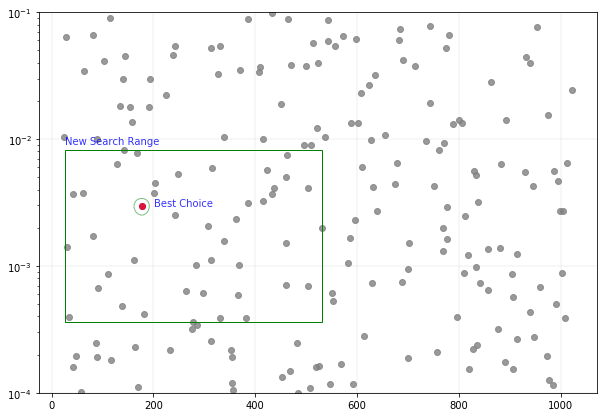

In [10]:
#Coarse Random Search
lr_rng_coarse = [-4,-1]
mbs_rng_coarse = [16,1024]

param1_coarse = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_coarse }
    
param2_coarse = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_coarse } 
    
lr_rng_fine, mbs_rng_fine, best_comb = random_search_2D(param1 = param1_coarse, param2 = param2_coarse , search_type ="coarse", evaluate_metric = "accuracy", sample_size = 200, search_summary = True, search_visualization = True)



Sample: 1/100 -- Learning Rate: 0.000401 | Minibatch Size: 148

Epoch: 1/5
15000/15000 [==========> 100%] - 45.20s | loss: 0.2274 | acc: 0.9377 | Val loss: 0.2344 | Val acc: 0.9408 
Epoch: 2/5
15000/15000 [==========> 100%] - 47.53s | loss: 0.1461 | acc: 0.9613 | Val loss: 0.1729 | Val acc: 0.9536 
Epoch: 3/5
15000/15000 [==========> 100%] - 44.81s | loss: 0.0927 | acc: 0.9771 | Val loss: 0.1340 | Val acc: 0.9648 
Epoch: 4/5
15000/15000 [==========> 100%] - 46.77s | loss: 0.0683 | acc: 0.9839 | Val loss: 0.1244 | Val acc: 0.9640 
Epoch: 5/5
15000/15000 [==========> 100%] - 47.04s | loss: 0.0500 | acc: 0.9887 | Val loss: 0.1173 | Val acc: 0.9664 

*************************** Total Training Time = 0hr 3mins 51secs 549.92ms ***************************

Sample: 2/100 -- Learning Rate: 0.006000 | Minibatch Size: 506

Epoch: 1/5
15000/15000 [==========> 100%] - 15.68s | loss: 0.2118 | acc: 0.9365 | Val loss: 0.2107 | Val acc: 0.9440 
Epoch: 2/5
15000/15000 [==========> 100%] - 16.03s | loss

15000/15000 [==========> 100%] - 32.85s | loss: 0.1170 | acc: 0.9689 | Val loss: 0.1577 | Val acc: 0.9584 
Epoch: 3/5
15000/15000 [==========> 100%] - 33.70s | loss: 0.0707 | acc: 0.9806 | Val loss: 0.1218 | Val acc: 0.9664 
Epoch: 4/5
15000/15000 [==========> 100%] - 30.99s | loss: 0.0488 | acc: 0.9888 | Val loss: 0.1164 | Val acc: 0.9664 
Epoch: 5/5
15000/15000 [==========> 100%] - 31.51s | loss: 0.0389 | acc: 0.9905 | Val loss: 0.1156 | Val acc: 0.9656 

*************************** Total Training Time = 0hr 2mins 40secs 317.09ms ***************************

Sample: 11/100 -- Learning Rate: 0.002210 | Minibatch Size: 160

Epoch: 1/5
15000/15000 [==========> 100%] - 43.75s | loss: 0.1478 | acc: 0.9575 | Val loss: 0.1809 | Val acc: 0.9464 
Epoch: 2/5
15000/15000 [==========> 100%] - 42.02s | loss: 0.0720 | acc: 0.9777 | Val loss: 0.1198 | Val acc: 0.9664 
Epoch: 3/5
15000/15000 [==========> 100%] - 43.31s | loss: 0.0343 | acc: 0.9902 | Val loss: 0.1104 | Val acc: 0.9672 
Epoch: 4/5
150

15000/15000 [==========> 100%] - 18.92s | loss: 0.0306 | acc: 0.9911 | Val loss: 0.1085 | Val acc: 0.9696 

*************************** Total Training Time = 0hr 1mins 32secs 886.96ms ***************************

Sample: 20/100 -- Learning Rate: 0.002709 | Minibatch Size: 340

Epoch: 1/5
15000/15000 [==========> 100%] - 24.06s | loss: 0.1591 | acc: 0.9558 | Val loss: 0.1817 | Val acc: 0.9536 
Epoch: 2/5
15000/15000 [==========> 100%] - 23.56s | loss: 0.0904 | acc: 0.9742 | Val loss: 0.1419 | Val acc: 0.9624 
Epoch: 3/5
15000/15000 [==========> 100%] - 22.92s | loss: 0.0513 | acc: 0.9857 | Val loss: 0.1129 | Val acc: 0.9696 
Epoch: 4/5
15000/15000 [==========> 100%] - 23.31s | loss: 0.0340 | acc: 0.9903 | Val loss: 0.1202 | Val acc: 0.9608 
Epoch: 5/5
15000/15000 [==========> 100%] - 22.48s | loss: 0.0270 | acc: 0.9920 | Val loss: 0.1098 | Val acc: 0.9680 

*************************** Total Training Time = 0hr 1mins 56secs 494.06ms ***************************

Sample: 21/100 -- Learning

15000/15000 [==========> 100%] - 41.22s | loss: 0.1413 | acc: 0.9601 | Val loss: 0.1744 | Val acc: 0.9568 
Epoch: 2/5
15000/15000 [==========> 100%] - 53.74s | loss: 0.0766 | acc: 0.9767 | Val loss: 0.1271 | Val acc: 0.9616 
Epoch: 3/5
15000/15000 [==========> 100%] - 45.92s | loss: 0.0392 | acc: 0.9881 | Val loss: 0.1019 | Val acc: 0.9696 
Epoch: 4/5
15000/15000 [==========> 100%] - 44.00s | loss: 0.0230 | acc: 0.9935 | Val loss: 0.0927 | Val acc: 0.9712 
Epoch: 5/5
15000/15000 [==========> 100%] - 43.80s | loss: 0.0269 | acc: 0.9916 | Val loss: 0.1131 | Val acc: 0.9664 

*************************** Total Training Time = 0hr 3mins 48secs 883.28ms ***************************

Sample: 30/100 -- Learning Rate: 0.001349 | Minibatch Size: 461

Epoch: 1/5
15000/15000 [==========> 100%] - 18.62s | loss: 0.2173 | acc: 0.9377 | Val loss: 0.2210 | Val acc: 0.9416 
Epoch: 2/5
15000/15000 [==========> 100%] - 17.61s | loss: 0.1425 | acc: 0.9603 | Val loss: 0.1721 | Val acc: 0.9544 
Epoch: 3/5
150

15000/15000 [==========> 100%] - 19.15s | loss: 0.0443 | acc: 0.9887 | Val loss: 0.1228 | Val acc: 0.9640 
Epoch: 5/5
15000/15000 [==========> 100%] - 19.11s | loss: 0.0262 | acc: 0.9944 | Val loss: 0.1022 | Val acc: 0.9704 

*************************** Total Training Time = 0hr 1mins 36secs 835.40ms ***************************

Sample: 39/100 -- Learning Rate: 0.004072 | Minibatch Size: 386

Epoch: 1/5
15000/15000 [==========> 100%] - 20.83s | loss: 0.1821 | acc: 0.9475 | Val loss: 0.2047 | Val acc: 0.9480 
Epoch: 2/5
15000/15000 [==========> 100%] - 21.02s | loss: 0.0978 | acc: 0.9709 | Val loss: 0.1371 | Val acc: 0.9632 
Epoch: 3/5
15000/15000 [==========> 100%] - 20.92s | loss: 0.0563 | acc: 0.9840 | Val loss: 0.1185 | Val acc: 0.9656 
Epoch: 4/5
15000/15000 [==========> 100%] - 20.76s | loss: 0.0302 | acc: 0.9920 | Val loss: 0.1066 | Val acc: 0.9664 
Epoch: 5/5
15000/15000 [==========> 100%] - 21.74s | loss: 0.0151 | acc: 0.9965 | Val loss: 0.0960 | Val acc: 0.9728 

*************

15000/15000 [==========> 100%] - 17.77s | loss: 0.1776 | acc: 0.9493 | Val loss: 0.1947 | Val acc: 0.9504 
Epoch: 2/5
15000/15000 [==========> 100%] - 16.50s | loss: 0.0980 | acc: 0.9713 | Val loss: 0.1389 | Val acc: 0.9616 
Epoch: 3/5
15000/15000 [==========> 100%] - 18.06s | loss: 0.0594 | acc: 0.9827 | Val loss: 0.1178 | Val acc: 0.9640 
Epoch: 4/5
15000/15000 [==========> 100%] - 17.77s | loss: 0.0347 | acc: 0.9909 | Val loss: 0.1156 | Val acc: 0.9632 
Epoch: 5/5
15000/15000 [==========> 100%] - 17.09s | loss: 0.0252 | acc: 0.9923 | Val loss: 0.1081 | Val acc: 0.9648 

*************************** Total Training Time = 0hr 1mins 27secs 359.03ms ***************************

Sample: 49/100 -- Learning Rate: 0.005054 | Minibatch Size: 423

Epoch: 1/5
15000/15000 [==========> 100%] - 15.77s | loss: 0.2005 | acc: 0.9419 | Val loss: 0.2184 | Val acc: 0.9392 
Epoch: 2/5
15000/15000 [==========> 100%] - 17.05s | loss: 0.1020 | acc: 0.9697 | Val loss: 0.1356 | Val acc: 0.9624 
Epoch: 3/5
150

15000/15000 [==========> 100%] - 19.87s | loss: 0.0368 | acc: 0.9895 | Val loss: 0.1103 | Val acc: 0.9688 
Epoch: 5/5
15000/15000 [==========> 100%] - 19.63s | loss: 0.0236 | acc: 0.9927 | Val loss: 0.1100 | Val acc: 0.9720 

*************************** Total Training Time = 0hr 1mins 39secs 590.54ms ***************************

Sample: 58/100 -- Learning Rate: 0.006631 | Minibatch Size: 221

Epoch: 1/5
15000/15000 [==========> 100%] - 28.32s | loss: 0.1468 | acc: 0.9560 | Val loss: 0.1703 | Val acc: 0.9448 
Epoch: 2/5
15000/15000 [==========> 100%] - 29.75s | loss: 0.0943 | acc: 0.9697 | Val loss: 0.1454 | Val acc: 0.9544 
Epoch: 3/5
15000/15000 [==========> 100%] - 28.40s | loss: 0.0520 | acc: 0.9839 | Val loss: 0.1065 | Val acc: 0.9688 
Epoch: 4/5
15000/15000 [==========> 100%] - 28.35s | loss: 0.0304 | acc: 0.9902 | Val loss: 0.1031 | Val acc: 0.9688 
Epoch: 5/5
15000/15000 [==========> 100%] - 28.31s | loss: 0.0829 | acc: 0.9721 | Val loss: 0.1729 | Val acc: 0.9488 

*************

15000/15000 [==========> 100%] - 12.65s | loss: 0.2227 | acc: 0.9347 | Val loss: 0.2166 | Val acc: 0.9432 
Epoch: 2/5
15000/15000 [==========> 100%] - 12.64s | loss: 0.1162 | acc: 0.9653 | Val loss: 0.1392 | Val acc: 0.9640 
Epoch: 3/5
15000/15000 [==========> 100%] - 12.66s | loss: 0.0710 | acc: 0.9794 | Val loss: 0.1130 | Val acc: 0.9672 
Epoch: 4/5
15000/15000 [==========> 100%] - 12.65s | loss: 0.0554 | acc: 0.9822 | Val loss: 0.1346 | Val acc: 0.9584 
Epoch: 5/5
15000/15000 [==========> 100%] - 13.62s | loss: 0.0331 | acc: 0.9901 | Val loss: 0.0978 | Val acc: 0.9736 

*************************** Total Training Time = 0hr 1mins 4secs 369.38ms ***************************

Sample: 68/100 -- Learning Rate: 0.000981 | Minibatch Size: 99

Epoch: 1/5
15000/15000 [==========> 100%] - 66.95s | loss: 0.1737 | acc: 0.9486 | Val loss: 0.2059 | Val acc: 0.9400 
Epoch: 2/5
15000/15000 [==========> 100%] - 67.24s | loss: 0.0718 | acc: 0.9809 | Val loss: 0.1241 | Val acc: 0.9688 
Epoch: 3/5
15000

15000/15000 [==========> 100%] - 18.02s | loss: 0.0441 | acc: 0.9863 | Val loss: 0.1283 | Val acc: 0.9640 
Epoch: 5/5
15000/15000 [==========> 100%] - 18.02s | loss: 0.0220 | acc: 0.9937 | Val loss: 0.0988 | Val acc: 0.9712 

*************************** Total Training Time = 0hr 1mins 30secs 457.61ms ***************************

Sample: 77/100 -- Learning Rate: 0.001408 | Minibatch Size: 418

Epoch: 1/5
15000/15000 [==========> 100%] - 16.26s | loss: 0.2060 | acc: 0.9409 | Val loss: 0.2215 | Val acc: 0.9432 
Epoch: 2/5
15000/15000 [==========> 100%] - 16.39s | loss: 0.1244 | acc: 0.9661 | Val loss: 0.1598 | Val acc: 0.9600 
Epoch: 3/5
15000/15000 [==========> 100%] - 16.55s | loss: 0.0789 | acc: 0.9791 | Val loss: 0.1278 | Val acc: 0.9632 
Epoch: 4/5
15000/15000 [==========> 100%] - 16.96s | loss: 0.0481 | acc: 0.9878 | Val loss: 0.1212 | Val acc: 0.9600 
Epoch: 5/5
15000/15000 [==========> 100%] - 16.65s | loss: 0.0352 | acc: 0.9912 | Val loss: 0.1103 | Val acc: 0.9672 

*************

15000/15000 [==========> 100%] - 25.28s | loss: 0.1501 | acc: 0.9552 | Val loss: 0.1769 | Val acc: 0.9504 
Epoch: 2/5
15000/15000 [==========> 100%] - 26.54s | loss: 0.0766 | acc: 0.9770 | Val loss: 0.1349 | Val acc: 0.9640 
Epoch: 3/5
15000/15000 [==========> 100%] - 25.03s | loss: 0.0467 | acc: 0.9862 | Val loss: 0.1186 | Val acc: 0.9664 
Epoch: 4/5
15000/15000 [==========> 100%] - 24.76s | loss: 0.0400 | acc: 0.9877 | Val loss: 0.1064 | Val acc: 0.9712 
Epoch: 5/5
15000/15000 [==========> 100%] - 24.91s | loss: 0.0247 | acc: 0.9913 | Val loss: 0.1107 | Val acc: 0.9672 

*************************** Total Training Time = 0hr 2mins 6secs 686.37ms ***************************

Sample: 87/100 -- Learning Rate: 0.000743 | Minibatch Size: 162

Epoch: 1/5
15000/15000 [==========> 100%] - 42.45s | loss: 0.1995 | acc: 0.9424 | Val loss: 0.2180 | Val acc: 0.9416 
Epoch: 2/5
15000/15000 [==========> 100%] - 42.17s | loss: 0.1124 | acc: 0.9707 | Val loss: 0.1591 | Val acc: 0.9576 
Epoch: 3/5
1500

15000/15000 [==========> 100%] - 12.66s | loss: 0.0585 | acc: 0.9811 | Val loss: 0.1351 | Val acc: 0.9640 
Epoch: 5/5
15000/15000 [==========> 100%] - 12.63s | loss: 0.0360 | acc: 0.9889 | Val loss: 0.1116 | Val acc: 0.9712 

*************************** Total Training Time = 0hr 1mins 5secs 785.18ms ***************************

Sample: 96/100 -- Learning Rate: 0.001698 | Minibatch Size: 313

Epoch: 1/5
15000/15000 [==========> 100%] - 21.74s | loss: 0.1724 | acc: 0.9491 | Val loss: 0.1898 | Val acc: 0.9488 
Epoch: 2/5
15000/15000 [==========> 100%] - 21.78s | loss: 0.0945 | acc: 0.9741 | Val loss: 0.1379 | Val acc: 0.9616 
Epoch: 3/5
15000/15000 [==========> 100%] - 21.86s | loss: 0.0583 | acc: 0.9840 | Val loss: 0.1190 | Val acc: 0.9648 
Epoch: 4/5
15000/15000 [==========> 100%] - 21.86s | loss: 0.0344 | acc: 0.9921 | Val loss: 0.1130 | Val acc: 0.9648 
Epoch: 5/5
15000/15000 [==========> 100%] - 22.05s | loss: 0.0228 | acc: 0.9942 | Val loss: 0.1067 | Val acc: 0.9664 

**************

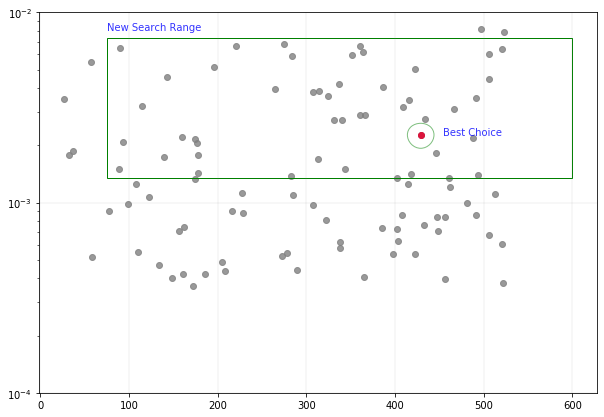

In [11]:
#Fine Random Search

param1_fine = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_fine }
    
param2_fine = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_fine } 
    
lr_rng_detail, mbs_rng_detail, best_comb = random_search_2D(param1 = param1_fine, param2 = param2_fine , search_type ="fine", evaluate_metric = "accuracy", sample_size = 100, search_summary = True, search_visualization = True)



Sample: 1/100 -- Learning Rate: 0.005811 | Minibatch Size: 420

Epoch: 1/10
15000/15000 [==========> 100%] - 13.84s | loss: 0.1915 | acc: 0.9449 | Val loss: 0.1972 | Val acc: 0.9416 
Epoch: 2/10
15000/15000 [==========> 100%] - 15.34s | loss: 0.1024 | acc: 0.9704 | Val loss: 0.1354 | Val acc: 0.9632 
Epoch: 3/10
15000/15000 [==========> 100%] - 17.87s | loss: 0.0615 | acc: 0.9813 | Val loss: 0.1077 | Val acc: 0.9648 
Epoch: 4/10
15000/15000 [==========> 100%] - 18.58s | loss: 0.0464 | acc: 0.9850 | Val loss: 0.1233 | Val acc: 0.9600 
Epoch: 5/10
15000/15000 [==========> 100%] - 17.09s | loss: 0.0236 | acc: 0.9928 | Val loss: 0.1083 | Val acc: 0.9704 
Epoch: 6/10
15000/15000 [==========> 100%] - 17.35s | loss: 0.0235 | acc: 0.9931 | Val loss: 0.1090 | Val acc: 0.9672 
Epoch: 7/10
15000/15000 [==========> 100%] - 16.15s | loss: 0.0084 | acc: 0.9983 | Val loss: 0.0886 | Val acc: 0.9736 
Epoch: 8/10
15000/15000 [==========> 100%] - 16.27s | loss: 0.0111 | acc: 0.9963 | Val loss: 0.1218 | 

15000/15000 [==========> 100%] - 12.47s | loss: 0.0291 | acc: 0.9945 | Val loss: 0.1086 | Val acc: 0.9712 
Epoch: 7/10
15000/15000 [==========> 100%] - 12.47s | loss: 0.0193 | acc: 0.9967 | Val loss: 0.1052 | Val acc: 0.9704 
Epoch: 8/10
15000/15000 [==========> 100%] - 12.44s | loss: 0.0131 | acc: 0.9987 | Val loss: 0.1003 | Val acc: 0.9712 
Epoch: 9/10
15000/15000 [==========> 100%] - 12.49s | loss: 0.0093 | acc: 0.9991 | Val loss: 0.0962 | Val acc: 0.9728 
Epoch: 10/10
15000/15000 [==========> 100%] - 13.23s | loss: 0.0055 | acc: 0.9999 | Val loss: 0.0982 | Val acc: 0.9752 

*************************** Total Training Time = 0hr 2mins 5secs 510.33ms ***************************

Sample: 7/100 -- Learning Rate: 0.002053 | Minibatch Size: 589

Epoch: 1/10
15000/15000 [==========> 100%] - 12.06s | loss: 0.2242 | acc: 0.9358 | Val loss: 0.2308 | Val acc: 0.9424 
Epoch: 2/10
15000/15000 [==========> 100%] - 12.48s | loss: 0.1320 | acc: 0.9633 | Val loss: 0.1589 | Val acc: 0.9576 
Epoch: 3/

15000/15000 [==========> 100%] - 12.55s | loss: 0.2199 | acc: 0.9351 | Val loss: 0.2269 | Val acc: 0.9352 
Epoch: 2/10
15000/15000 [==========> 100%] - 12.60s | loss: 0.1256 | acc: 0.9641 | Val loss: 0.1590 | Val acc: 0.9584 
Epoch: 3/10
15000/15000 [==========> 100%] - 12.66s | loss: 0.0732 | acc: 0.9791 | Val loss: 0.1257 | Val acc: 0.9648 
Epoch: 4/10
15000/15000 [==========> 100%] - 12.71s | loss: 0.0407 | acc: 0.9892 | Val loss: 0.1169 | Val acc: 0.9648 
Epoch: 5/10
15000/15000 [==========> 100%] - 13.09s | loss: 0.0327 | acc: 0.9923 | Val loss: 0.1162 | Val acc: 0.9680 
Epoch: 6/10
15000/15000 [==========> 100%] - 13.19s | loss: 0.0172 | acc: 0.9969 | Val loss: 0.0982 | Val acc: 0.9688 
Epoch: 7/10
15000/15000 [==========> 100%] - 12.71s | loss: 0.0082 | acc: 0.9990 | Val loss: 0.0980 | Val acc: 0.9744 
Epoch: 8/10
15000/15000 [==========> 100%] - 13.73s | loss: 0.0057 | acc: 0.9996 | Val loss: 0.1108 | Val acc: 0.9704 
Epoch: 9/10
15000/15000 [==========> 100%] - 13.53s | loss: 

15000/15000 [==========> 100%] - 40.82s | loss: 0.0219 | acc: 0.9925 | Val loss: 0.1475 | Val acc: 0.9584 
Epoch: 9/10
15000/15000 [==========> 100%] - 40.95s | loss: 0.0293 | acc: 0.9895 | Val loss: 0.1776 | Val acc: 0.9592 
Epoch: 10/10
15000/15000 [==========> 100%] - 40.70s | loss: 0.0182 | acc: 0.9943 | Val loss: 0.1190 | Val acc: 0.9672 

*************************** Total Training Time = 0hr 6mins 59secs 255.60ms ***************************

Sample: 18/100 -- Learning Rate: 0.002177 | Minibatch Size: 279

Epoch: 1/10
15000/15000 [==========> 100%] - 25.65s | loss: 0.1576 | acc: 0.9535 | Val loss: 0.1820 | Val acc: 0.9488 
Epoch: 2/10
15000/15000 [==========> 100%] - 24.21s | loss: 0.0770 | acc: 0.9786 | Val loss: 0.1272 | Val acc: 0.9600 
Epoch: 3/10
15000/15000 [==========> 100%] - 24.73s | loss: 0.0378 | acc: 0.9906 | Val loss: 0.1055 | Val acc: 0.9680 
Epoch: 4/10
15000/15000 [==========> 100%] - 24.26s | loss: 0.0258 | acc: 0.9933 | Val loss: 0.0876 | Val acc: 0.9744 
Epoch: 

15000/15000 [==========> 100%] - 19.30s | loss: 0.0875 | acc: 0.9745 | Val loss: 0.1245 | Val acc: 0.9616 
Epoch: 3/10
15000/15000 [==========> 100%] - 19.29s | loss: 0.0456 | acc: 0.9868 | Val loss: 0.1065 | Val acc: 0.9656 
Epoch: 4/10
15000/15000 [==========> 100%] - 19.69s | loss: 0.0270 | acc: 0.9923 | Val loss: 0.1024 | Val acc: 0.9680 
Epoch: 5/10
15000/15000 [==========> 100%] - 19.09s | loss: 0.0204 | acc: 0.9943 | Val loss: 0.1063 | Val acc: 0.9696 
Epoch: 6/10
15000/15000 [==========> 100%] - 19.12s | loss: 0.0147 | acc: 0.9960 | Val loss: 0.0972 | Val acc: 0.9704 
Epoch: 7/10
15000/15000 [==========> 100%] - 19.56s | loss: 0.0087 | acc: 0.9975 | Val loss: 0.1155 | Val acc: 0.9688 
Epoch: 8/10
15000/15000 [==========> 100%] - 19.12s | loss: 0.0046 | acc: 0.9994 | Val loss: 0.0982 | Val acc: 0.9704 
Epoch: 9/10
15000/15000 [==========> 100%] - 19.10s | loss: 0.0047 | acc: 0.9993 | Val loss: 0.1262 | Val acc: 0.9680 
Epoch: 10/10
15000/15000 [==========> 100%] - 19.05s | loss:

15000/15000 [==========> 100%] - 26.66s | loss: 0.0154 | acc: 0.9945 | Val loss: 0.1467 | Val acc: 0.9664 
Epoch: 10/10
15000/15000 [==========> 100%] - 35.48s | loss: 0.0123 | acc: 0.9971 | Val loss: 0.1386 | Val acc: 0.9672 

*************************** Total Training Time = 0hr 4mins 43secs 699.14ms ***************************

Sample: 29/100 -- Learning Rate: 0.002312 | Minibatch Size: 78

Epoch: 1/10
15000/15000 [==========> 100%] - 107.21s | loss: 0.1552 | acc: 0.9516 | Val loss: 0.1933 | Val acc: 0.9416 
Epoch: 2/10
15000/15000 [==========> 100%] - 108.15s | loss: 0.0720 | acc: 0.9777 | Val loss: 0.1297 | Val acc: 0.9664 
Epoch: 3/10
15000/15000 [==========> 100%] - 106.21s | loss: 0.0431 | acc: 0.9853 | Val loss: 0.1285 | Val acc: 0.9624 
Epoch: 4/10
15000/15000 [==========> 100%] - 107.11s | loss: 0.0501 | acc: 0.9822 | Val loss: 0.1199 | Val acc: 0.9624 
Epoch: 5/10
15000/15000 [==========> 100%] - 121.04s | loss: 0.0393 | acc: 0.9861 | Val loss: 0.1380 | Val acc: 0.9632 
Epo

15000/15000 [==========> 100%] - 24.19s | loss: 0.0524 | acc: 0.9863 | Val loss: 0.1133 | Val acc: 0.9680 
Epoch: 4/10
15000/15000 [==========> 100%] - 23.31s | loss: 0.0338 | acc: 0.9908 | Val loss: 0.1054 | Val acc: 0.9656 
Epoch: 5/10
15000/15000 [==========> 100%] - 23.99s | loss: 0.0177 | acc: 0.9959 | Val loss: 0.1036 | Val acc: 0.9672 
Epoch: 6/10
15000/15000 [==========> 100%] - 25.61s | loss: 0.0162 | acc: 0.9961 | Val loss: 0.1085 | Val acc: 0.9680 
Epoch: 7/10
15000/15000 [==========> 100%] - 23.47s | loss: 0.0055 | acc: 0.9993 | Val loss: 0.0902 | Val acc: 0.9744 
Epoch: 8/10
15000/15000 [==========> 100%] - 23.29s | loss: 0.0050 | acc: 0.9990 | Val loss: 0.1123 | Val acc: 0.9712 
Epoch: 9/10
15000/15000 [==========> 100%] - 22.90s | loss: 0.0022 | acc: 0.9997 | Val loss: 0.1003 | Val acc: 0.9744 
Epoch: 10/10
15000/15000 [==========> 100%] - 23.50s | loss: 0.0009 | acc: 1.0000 | Val loss: 0.0955 | Val acc: 0.9736 

*************************** Total Training Time = 0hr 3min

15000/15000 [==========> 100%] - 22.52s | loss: 0.0028 | acc: 0.9997 | Val loss: 0.1089 | Val acc: 0.9728 

*************************** Total Training Time = 0hr 3mins 46secs 698.53ms ***************************

Sample: 40/100 -- Learning Rate: 0.006180 | Minibatch Size: 307

Epoch: 1/10
15000/15000 [==========> 100%] - 26.80s | loss: 0.1583 | acc: 0.9531 | Val loss: 0.1674 | Val acc: 0.9520 
Epoch: 2/10
15000/15000 [==========> 100%] - 27.35s | loss: 0.0903 | acc: 0.9729 | Val loss: 0.1181 | Val acc: 0.9608 
Epoch: 3/10
15000/15000 [==========> 100%] - 28.01s | loss: 0.0520 | acc: 0.9839 | Val loss: 0.1085 | Val acc: 0.9648 
Epoch: 4/10
15000/15000 [==========> 100%] - 28.79s | loss: 0.0352 | acc: 0.9893 | Val loss: 0.1179 | Val acc: 0.9648 
Epoch: 5/10
15000/15000 [==========> 100%] - 24.32s | loss: 0.0258 | acc: 0.9921 | Val loss: 0.0942 | Val acc: 0.9752 
Epoch: 6/10
15000/15000 [==========> 100%] - 24.85s | loss: 0.0150 | acc: 0.9961 | Val loss: 0.0947 | Val acc: 0.9752 
Epoch: 7

15000/15000 [==========> 100%] - 37.41s | loss: 0.0290 | acc: 0.9919 | Val loss: 0.0902 | Val acc: 0.9704 
Epoch: 5/10
15000/15000 [==========> 100%] - 36.89s | loss: 0.0273 | acc: 0.9917 | Val loss: 0.1076 | Val acc: 0.9664 
Epoch: 6/10
15000/15000 [==========> 100%] - 38.86s | loss: 0.0104 | acc: 0.9975 | Val loss: 0.0952 | Val acc: 0.9696 
Epoch: 7/10
15000/15000 [==========> 100%] - 36.28s | loss: 0.0037 | acc: 0.9996 | Val loss: 0.0840 | Val acc: 0.9760 
Epoch: 8/10
15000/15000 [==========> 100%] - 35.89s | loss: 0.0040 | acc: 0.9993 | Val loss: 0.0895 | Val acc: 0.9720 
Epoch: 9/10
15000/15000 [==========> 100%] - 37.62s | loss: 0.0017 | acc: 0.9999 | Val loss: 0.0922 | Val acc: 0.9752 
Epoch: 10/10
15000/15000 [==========> 100%] - 37.97s | loss: 0.0007 | acc: 1.0000 | Val loss: 0.0940 | Val acc: 0.9768 

*************************** Total Training Time = 0hr 6mins 5secs 156.42ms ***************************

Sample: 46/100 -- Learning Rate: 0.003198 | Minibatch Size: 253

Epoch: 1

15000/15000 [==========> 100%] - 12.29s | loss: 0.2163 | acc: 0.9383 | Val loss: 0.2341 | Val acc: 0.9400 
Epoch: 2/10
15000/15000 [==========> 100%] - 12.29s | loss: 0.1284 | acc: 0.9619 | Val loss: 0.1564 | Val acc: 0.9592 
Epoch: 3/10
15000/15000 [==========> 100%] - 12.68s | loss: 0.0755 | acc: 0.9775 | Val loss: 0.1259 | Val acc: 0.9704 
Epoch: 4/10
15000/15000 [==========> 100%] - 12.57s | loss: 0.0533 | acc: 0.9829 | Val loss: 0.1358 | Val acc: 0.9536 
Epoch: 5/10
15000/15000 [==========> 100%] - 12.89s | loss: 0.0310 | acc: 0.9920 | Val loss: 0.1144 | Val acc: 0.9672 
Epoch: 6/10
15000/15000 [==========> 100%] - 12.42s | loss: 0.0165 | acc: 0.9962 | Val loss: 0.0894 | Val acc: 0.9744 
Epoch: 7/10
15000/15000 [==========> 100%] - 12.44s | loss: 0.0118 | acc: 0.9968 | Val loss: 0.0985 | Val acc: 0.9760 
Epoch: 8/10
15000/15000 [==========> 100%] - 12.45s | loss: 0.0068 | acc: 0.9988 | Val loss: 0.1126 | Val acc: 0.9720 
Epoch: 9/10
15000/15000 [==========> 100%] - 12.51s | loss: 

15000/15000 [==========> 100%] - 14.01s | loss: 0.0122 | acc: 0.9969 | Val loss: 0.1358 | Val acc: 0.9656 
Epoch: 9/10
15000/15000 [==========> 100%] - 14.65s | loss: 0.0108 | acc: 0.9965 | Val loss: 0.1367 | Val acc: 0.9680 
Epoch: 10/10
15000/15000 [==========> 100%] - 15.52s | loss: 0.0079 | acc: 0.9982 | Val loss: 0.1330 | Val acc: 0.9648 

*************************** Total Training Time = 0hr 2mins 29secs 90.61ms ***************************

Sample: 57/100 -- Learning Rate: 0.002602 | Minibatch Size: 87

Epoch: 1/10
15000/15000 [==========> 100%] - 88.04s | loss: 0.1477 | acc: 0.9547 | Val loss: 0.1899 | Val acc: 0.9456 
Epoch: 2/10
15000/15000 [==========> 100%] - 94.00s | loss: 0.0574 | acc: 0.9840 | Val loss: 0.1161 | Val acc: 0.9680 
Epoch: 3/10
15000/15000 [==========> 100%] - 91.04s | loss: 0.0614 | acc: 0.9793 | Val loss: 0.1540 | Val acc: 0.9584 
Epoch: 4/10
15000/15000 [==========> 100%] - 92.89s | loss: 0.0486 | acc: 0.9845 | Val loss: 0.1288 | Val acc: 0.9624 
Epoch: 5/

15000/15000 [==========> 100%] - 30.26s | loss: 0.0798 | acc: 0.9777 | Val loss: 0.1245 | Val acc: 0.9680 
Epoch: 3/10
15000/15000 [==========> 100%] - 28.69s | loss: 0.0436 | acc: 0.9889 | Val loss: 0.1076 | Val acc: 0.9664 
Epoch: 4/10
15000/15000 [==========> 100%] - 29.04s | loss: 0.0364 | acc: 0.9894 | Val loss: 0.1079 | Val acc: 0.9664 
Epoch: 5/10
15000/15000 [==========> 100%] - 27.91s | loss: 0.0172 | acc: 0.9953 | Val loss: 0.0984 | Val acc: 0.9736 
Epoch: 6/10
15000/15000 [==========> 100%] - 29.18s | loss: 0.0161 | acc: 0.9959 | Val loss: 0.1313 | Val acc: 0.9616 
Epoch: 7/10
15000/15000 [==========> 100%] - 28.27s | loss: 0.0046 | acc: 0.9995 | Val loss: 0.0875 | Val acc: 0.9760 
Epoch: 8/10
15000/15000 [==========> 100%] - 28.72s | loss: 0.0086 | acc: 0.9979 | Val loss: 0.1055 | Val acc: 0.9736 
Epoch: 9/10
15000/15000 [==========> 100%] - 29.50s | loss: 0.0076 | acc: 0.9977 | Val loss: 0.1019 | Val acc: 0.9712 
Epoch: 10/10
15000/15000 [==========> 100%] - 28.20s | loss:

15000/15000 [==========> 100%] - 15.45s | loss: 0.0049 | acc: 0.9990 | Val loss: 0.1070 | Val acc: 0.9720 
Epoch: 10/10
15000/15000 [==========> 100%] - 14.94s | loss: 0.0018 | acc: 1.0000 | Val loss: 0.1063 | Val acc: 0.9688 

*************************** Total Training Time = 0hr 2mins 34secs 608.96ms ***************************

Sample: 68/100 -- Learning Rate: 0.001531 | Minibatch Size: 430

Epoch: 1/10
15000/15000 [==========> 100%] - 20.74s | loss: 0.2041 | acc: 0.9403 | Val loss: 0.2125 | Val acc: 0.9448 
Epoch: 2/10
15000/15000 [==========> 100%] - 20.72s | loss: 0.1251 | acc: 0.9645 | Val loss: 0.1664 | Val acc: 0.9560 
Epoch: 3/10
15000/15000 [==========> 100%] - 21.73s | loss: 0.0796 | acc: 0.9775 | Val loss: 0.1274 | Val acc: 0.9640 
Epoch: 4/10
15000/15000 [==========> 100%] - 21.05s | loss: 0.0513 | acc: 0.9873 | Val loss: 0.1260 | Val acc: 0.9600 
Epoch: 5/10
15000/15000 [==========> 100%] - 21.35s | loss: 0.0323 | acc: 0.9925 | Val loss: 0.1048 | Val acc: 0.9688 
Epoch: 

15000/15000 [==========> 100%] - 17.84s | loss: 0.0671 | acc: 0.9801 | Val loss: 0.1151 | Val acc: 0.9664 
Epoch: 4/10
15000/15000 [==========> 100%] - 17.12s | loss: 0.0499 | acc: 0.9841 | Val loss: 0.1320 | Val acc: 0.9648 
Epoch: 5/10
15000/15000 [==========> 100%] - 17.64s | loss: 0.0452 | acc: 0.9844 | Val loss: 0.1324 | Val acc: 0.9576 
Epoch: 6/10
15000/15000 [==========> 100%] - 17.52s | loss: 0.0180 | acc: 0.9951 | Val loss: 0.1184 | Val acc: 0.9696 
Epoch: 7/10
15000/15000 [==========> 100%] - 17.82s | loss: 0.0175 | acc: 0.9943 | Val loss: 0.1210 | Val acc: 0.9688 
Epoch: 8/10
15000/15000 [==========> 100%] - 18.28s | loss: 0.0119 | acc: 0.9964 | Val loss: 0.1325 | Val acc: 0.9640 
Epoch: 9/10
15000/15000 [==========> 100%] - 17.62s | loss: 0.0091 | acc: 0.9979 | Val loss: 0.1229 | Val acc: 0.9712 
Epoch: 10/10
15000/15000 [==========> 100%] - 17.96s | loss: 0.0073 | acc: 0.9983 | Val loss: 0.1393 | Val acc: 0.9688 

*************************** Total Training Time = 0hr 2min

15000/15000 [==========> 100%] - 13.16s | loss: 0.0011 | acc: 1.0000 | Val loss: 0.0981 | Val acc: 0.9768 

*************************** Total Training Time = 0hr 2mins 11secs 511.77ms ***************************

Sample: 79/100 -- Learning Rate: 0.005161 | Minibatch Size: 201

Epoch: 1/10
15000/15000 [==========> 100%] - 33.49s | loss: 0.1392 | acc: 0.9590 | Val loss: 0.1716 | Val acc: 0.9504 
Epoch: 2/10
15000/15000 [==========> 100%] - 35.50s | loss: 0.0805 | acc: 0.9762 | Val loss: 0.1327 | Val acc: 0.9592 
Epoch: 3/10
15000/15000 [==========> 100%] - 35.15s | loss: 0.0491 | acc: 0.9843 | Val loss: 0.1337 | Val acc: 0.9664 
Epoch: 4/10
15000/15000 [==========> 100%] - 37.58s | loss: 0.0450 | acc: 0.9852 | Val loss: 0.1135 | Val acc: 0.9664 
Epoch: 5/10
15000/15000 [==========> 100%] - 33.80s | loss: 0.0357 | acc: 0.9870 | Val loss: 0.1142 | Val acc: 0.9632 
Epoch: 6/10
15000/15000 [==========> 100%] - 31.92s | loss: 0.0191 | acc: 0.9928 | Val loss: 0.1326 | Val acc: 0.9688 
Epoch: 7

15000/15000 [==========> 100%] - 14.03s | loss: 0.0416 | acc: 0.9878 | Val loss: 0.1187 | Val acc: 0.9672 
Epoch: 5/10
15000/15000 [==========> 100%] - 14.06s | loss: 0.0373 | acc: 0.9895 | Val loss: 0.1141 | Val acc: 0.9688 
Epoch: 6/10
15000/15000 [==========> 100%] - 14.03s | loss: 0.0131 | acc: 0.9976 | Val loss: 0.0927 | Val acc: 0.9736 
Epoch: 7/10
15000/15000 [==========> 100%] - 14.07s | loss: 0.0101 | acc: 0.9974 | Val loss: 0.0979 | Val acc: 0.9728 
Epoch: 8/10
15000/15000 [==========> 100%] - 14.12s | loss: 0.0059 | acc: 0.9992 | Val loss: 0.1053 | Val acc: 0.9728 
Epoch: 9/10
15000/15000 [==========> 100%] - 14.09s | loss: 0.0036 | acc: 0.9997 | Val loss: 0.1022 | Val acc: 0.9736 
Epoch: 10/10
15000/15000 [==========> 100%] - 14.08s | loss: 0.0015 | acc: 0.9999 | Val loss: 0.1073 | Val acc: 0.9712 

*************************** Total Training Time = 0hr 2mins 23secs 192.75ms ***************************

Sample: 85/100 -- Learning Rate: 0.002775 | Minibatch Size: 259

Epoch: 

15000/15000 [==========> 100%] - 37.86s | loss: 0.1282 | acc: 0.9621 | Val loss: 0.1658 | Val acc: 0.9520 
Epoch: 2/10
15000/15000 [==========> 100%] - 37.99s | loss: 0.0601 | acc: 0.9820 | Val loss: 0.1151 | Val acc: 0.9656 
Epoch: 3/10
15000/15000 [==========> 100%] - 36.51s | loss: 0.0494 | acc: 0.9844 | Val loss: 0.1333 | Val acc: 0.9568 
Epoch: 4/10
15000/15000 [==========> 100%] - 35.84s | loss: 0.0422 | acc: 0.9855 | Val loss: 0.1165 | Val acc: 0.9648 
Epoch: 5/10
15000/15000 [==========> 100%] - 36.29s | loss: 0.0332 | acc: 0.9893 | Val loss: 0.1296 | Val acc: 0.9624 
Epoch: 6/10
15000/15000 [==========> 100%] - 36.28s | loss: 0.0141 | acc: 0.9955 | Val loss: 0.1279 | Val acc: 0.9720 
Epoch: 7/10
15000/15000 [==========> 100%] - 36.25s | loss: 0.0179 | acc: 0.9943 | Val loss: 0.1286 | Val acc: 0.9680 
Epoch: 8/10
15000/15000 [==========> 100%] - 36.48s | loss: 0.0223 | acc: 0.9931 | Val loss: 0.1190 | Val acc: 0.9680 
Epoch: 9/10
15000/15000 [==========> 100%] - 36.93s | loss: 

15000/15000 [==========> 100%] - 53.68s | loss: 0.0323 | acc: 0.9886 | Val loss: 0.1236 | Val acc: 0.9640 
Epoch: 9/10
15000/15000 [==========> 100%] - 54.91s | loss: 0.0318 | acc: 0.9881 | Val loss: 0.1480 | Val acc: 0.9592 
Epoch: 10/10
15000/15000 [==========> 100%] - 54.12s | loss: 0.0099 | acc: 0.9969 | Val loss: 0.1073 | Val acc: 0.9712 

*************************** Total Training Time = 0hr 9mins 8secs 162.15ms ***************************

Sample: 96/100 -- Learning Rate: 0.003229 | Minibatch Size: 273

Epoch: 1/10
15000/15000 [==========> 100%] - 30.68s | loss: 0.1388 | acc: 0.9597 | Val loss: 0.1587 | Val acc: 0.9520 
Epoch: 2/10
15000/15000 [==========> 100%] - 30.14s | loss: 0.0723 | acc: 0.9791 | Val loss: 0.1229 | Val acc: 0.9616 
Epoch: 3/10
15000/15000 [==========> 100%] - 30.15s | loss: 0.0362 | acc: 0.9897 | Val loss: 0.0997 | Val acc: 0.9720 
Epoch: 4/10
15000/15000 [==========> 100%] - 29.81s | loss: 0.0200 | acc: 0.9950 | Val loss: 0.0916 | Val acc: 0.9720 
Epoch: 5

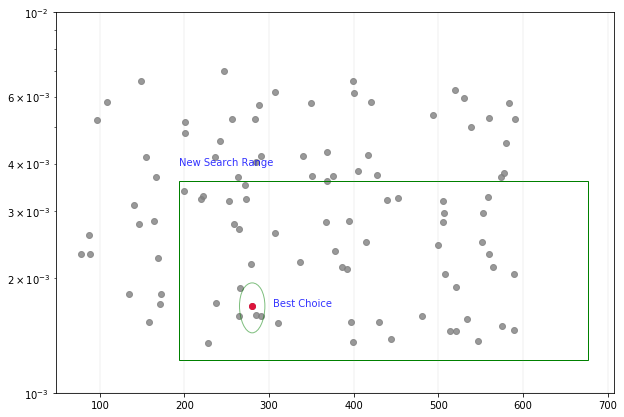

In [12]:
#Detail Random Search

param1_detail = {"hParam type": "learning_rate" ,
          "hParam range": lr_rng_detail }
    
param2_detail = {"hParam type": "minibatch_size",
          "hParam range": mbs_rng_detail } 
    
lr_rng_fine, mbs_rng_fine, best_comb = random_search_2D(param1 = param1_detail, param2 = param2_detail , search_type ="detail", evaluate_metric = "accuracy", sample_size = 100, search_summary = True, search_visualization = True)


In [13]:
hyper_params = {"tuned_learning_rate":best_comb[1],
               "tuned_minibatch_size":best_comb[2]}
print(hyper_params)

{'tuned_learning_rate': 0.001690971260603747, 'tuned_minibatch_size': 280}


In [14]:
save_model(file_name = "tunedHyperParameters", parameters = hyper_params)

In [15]:
loaded_hyper_params = load_model(file_name = "tunedHyperParameters")
print(loaded_hyper_params)

{'tuned_learning_rate': 0.001690971260603747, 'tuned_minibatch_size': 280}


In [ ]:
for key,value in loaded_hyper_params.items():
    print(key + ": " + str(value))